# Voorbeeld 3

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
oo = sym.Dummy('oo', prime=True)
very_small = 1/oo
x = sym.symbols('x')

C_1, C_2, C_3, C_4 = sym.symbols('C_1, C_2, C_3, C_4')
A_v, B_v, C_v = sym.symbols('A_v, B_v, C_v')
ql, Vl, Ml, kappal, phil, wl = sym.symbols('q_z, V, M, kappa, phi, w')

In [16]:
L = 10
F = 35

EI = sym.symbols('EI')

q =  A_v * sym.SingularityFunction(x,0,-1) + F * sym.SingularityFunction(x, 7.5, -1) + B_v * sym.SingularityFunction(x,10,-1)
display(sym.Eq(ql,q))

In [17]:
V = -sym.integrate(q, x) + C_1
display(sym.Eq(Vl,V))
M = sym.integrate(V, x) + C_2
display(sym.Eq(Ml,M))
kappa = M/EI + 1/(2*EI)*sym.SingularityFunction(x,5,0)*(A_v*5) + 1/(2*EI)*sym.SingularityFunction(x,5,1)*(A_v) + 1/(2*EI)*sym.SingularityFunction(x,7.5,1)*(F)
display(sym.Eq(kappal,kappa))
phi = sym.integrate(kappa, x) + C_3
display(sym.Eq(phil,phi))
w = -sym.integrate(phi, x) + C_4
display(sym.Eq(wl,w))

In [18]:
Eq1 = sym.Eq(w.subs(x,0),0)
Eq2 = sym.Eq(w.subs(x,L),0)
Eq3 = sym.Eq(M.subs(x,0),0)
Eq4 = sym.Eq(M.subs(x,L),0)
Eq5 = sym.Eq(V.subs(x,0-very_small),0).subs(oo,sym.oo)
Eq6 = sym.Eq(V.subs(x,L+very_small),0).subs(oo,sym.oo)
display(Eq1, Eq2, Eq3, Eq4, Eq5, Eq6)

In [19]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6),(C_1,C_2,C_3,C_4,A_v,B_v))
display(sol)
display(sym.Eq(wl,w.subs(sol).factor(EI)))

In [20]:
w_numpy = sym.lambdify(x, w.subs(sol).subs(EI,10000).rewrite(sym.Piecewise))

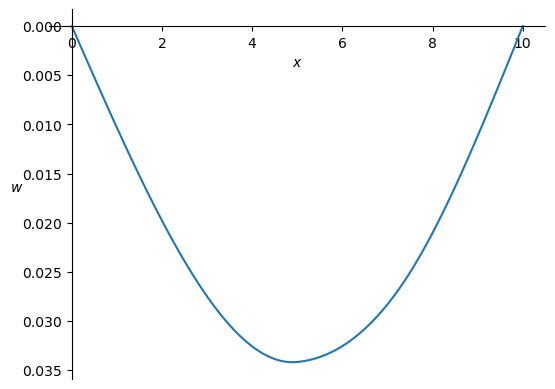

In [21]:
x_numpy = np.linspace(0,10,100)
plt.figure()
plt.plot(x_numpy,w_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$w$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [22]:
V_numpy = sym.lambdify(x, V.subs(sol).rewrite(sym.Piecewise))

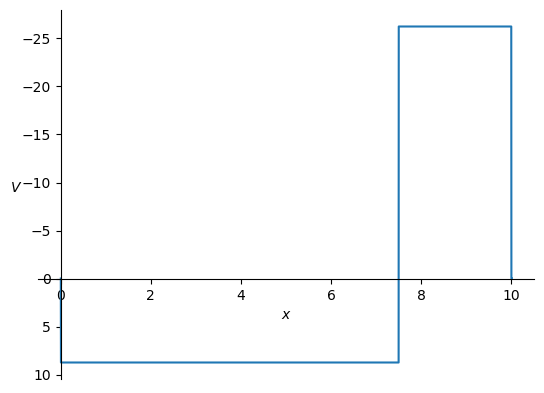

In [23]:
x_numpy = np.linspace(0,10.01,10000)
plt.figure()
plt.plot(x_numpy,V_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$V$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [24]:
M_numpy = sym.lambdify(x, M.subs(sol).rewrite(sym.Piecewise))

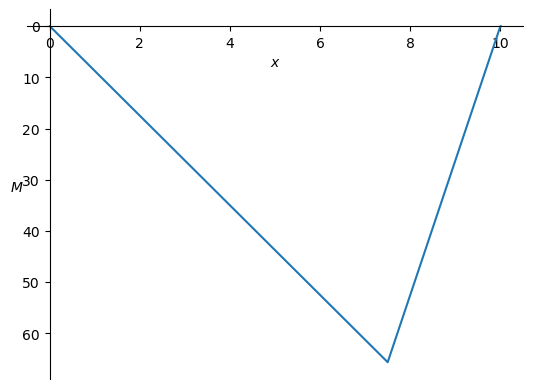

In [25]:
x_numpy = np.linspace(0,10.01,10000)
plt.figure()
plt.plot(x_numpy,M_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$M$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

In [26]:
kappa_numpy = sym.lambdify(x, kappa.subs(sol).subs(EI,10000).rewrite(sym.Piecewise))

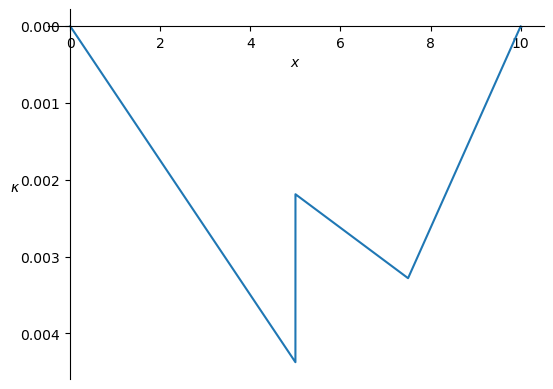

In [27]:
x_numpy = np.linspace(0,10.01,10000)
plt.figure()
plt.plot(x_numpy,kappa_numpy(x_numpy))
plt.xlabel('$x$')
plt.ylabel('$\kappa$',rotation=0);
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()